# Complex Networks
#### Igor F. Nascimento

# 1. Context
##### "Você deve escolher ao menos quatro redes disponíveis nos repositórios abaixo ou em outros repositórios (e não apenas as redes disponíveis no graph-tool), e caracterizá-las utilizando diferentes métricas, como grau, distância, tamanho das componentes conexas, e outras (você pode escolher outras). Para cada métrica analisada, calcule as seguintes estatísticas: máximo, mínimo, média, mediana, desvio padrão, e distribuição empírica (faça um gráfico). "

### 1.1 imports

In [1]:
import networkx as nx
from nxpd import draw
import pandas as pd
import termtables as tt
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Datasets

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)


### 1.3 Defines
##### Paths, and global variables

In [2]:
pathColab = './FirstWork/datasets/ca-HepTh.txt'
colColab = ['FromNodeID','ToNodeID']

## 2. Collaboration network
#### 2.1 Definition:
##### Arxiv HEP-TH (High Energy Physics - Theory) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to High Energy Physics - Theory category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

##### The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its HEP-TH section.

#### 2.2 Import and Characterizing the Dataset

In [3]:
df = pd.read_csv(pathColab, sep='\t', names=colColab)
G = nx.Graph()
tuples = [tuple(x) for x in df.values]
G.add_edges_from(tuples)
edges = G.edges

In [4]:
data = [["Paper Description", "Undirected", 9877, 25998],
        ["NetworkX","Undirected",  G.number_of_nodes(), G.number_of_edges()]]
print(tt.to_string(data, header=[ "Provider", "Type", "Nodes", "Edges"]))

┌───────────────────┬────────────┬───────┬───────┐
│ Provider          │ Type       │ Nodes │ Edges │
╞═══════════════════╪════════════╪═══════╪═══════╡
│ Paper Description │ Undirected │ 9877  │ 25998 │
├───────────────────┼────────────┼───────┼───────┤
│ NetworkX          │ Undirected │ 9877  │ 25998 │
└───────────────────┴────────────┴───────┴───────┘


In [5]:
print("Example of the data and Dataset descriptions \n")
print( df[0:5],'\n\n', df.describe())

Example of the data and Dataset descriptions 

   FromNodeID  ToNodeID
0       24325     24394
1       24325     40517
2       24325     58507
3       24394      3737
4       24394      3905 

          FromNodeID      ToNodeID
count  51971.000000  51971.000000
mean   34294.387389  34294.387389
std    19865.210725  19865.210725
min        1.000000      1.000000
25%    16854.000000  16854.000000
50%    34402.000000  34402.000000
75%    51315.000000  51315.000000
max    68745.000000  68745.000000


#### 2.3 Extracting Metrics
##### - Degree

In [7]:
df_stats = pd.DataFrame(nx.degree(G))
df_stats.columns = ['Node', 'Degree']
df_stats[0:5]

,Node,Degree
0,24325,3
1,24394,42
2,40517,49
3,58507,6
4,3737,22


In [8]:
data = [["Degree", df_stats['Degree'].max(), 
         df_stats['Degree'].min(), 
        df_stats['Degree'].mean(),
        df_stats['Degree'].median(),
         df_stats['Degree'].std()]]
print(tt.to_string(data, header=[ "Metric" , "Max", "Min", "Average", "Median", "Standard Deviation"]))

┌────────┬─────┬─────┬───────────────────┬────────┬────────────────────┐
│ Metric │ Max │ Min │ Average           │ Median │ Standard Deviation │
╞════════╪═════╪═════╪═══════════════════╪════════╪════════════════════╡
│ Degree │ 65  │ 1   │ 5.264351523742027 │ 3.0    │ 6.191594484556439  │
└────────┴─────┴─────┴───────────────────┴────────┴────────────────────┘


(Text(0, 0.5, 'frequency'),
 Text(0.5, 0, 'bins'),
 Text(0.5, 1.0, 'Degrees Histogram'))

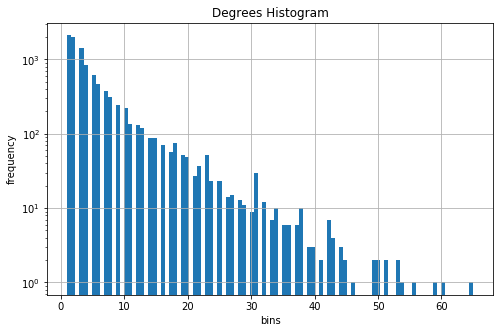

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.hist(df_stats['Degree'], bins=100)
ax.set_yscale('log')
ax.grid(True)
ax.set_ylabel('frequency'), ax.set_xlabel('bins'), ax.set_title('Degrees Histogram')

##### - Min Distance betwen pairs:
##### - df_statsDist = pd.DataFrame(nx.all_pairs_shortest_path(G))
##### - But this method is too expensive for reproduce, so we will adopt the Chebyshev's Inequality

In [11]:
import powerlaw
import numpy as np
data = np.arange(100) # data can be list or numpy array

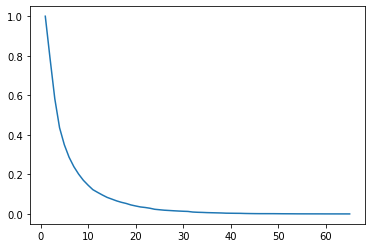

In [12]:
x,y = powerlaw.ccdf(df_stats['Degree'])
plt.plot(x,y)

In [ ]:
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

In [139]:
G[27892]

AtlasView({31145: {}})

In [140]:
nx.shortest_path(G,1,27892)

[1, 20692, 7367, 31145, 27892]

In [164]:
df_stats['Node'].unique()

array([24325, 24394, 40517, ..., 41589, 67175, 68026])

In [200]:
%time
n_nodes = 100
dist = list()

for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
        dist.append(nx.shortest_path_length(G,source_node))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [201]:
len(dist)

100

In [202]:
nx.shortest_path_length(G,6489,11090)

2

{60094: 0,
 36383: 1,
 61580: 1,
 66522: 1,
 22613: 1,
 40047: 1,
 24394: 2,
 52419: 2,
 52458: 2,
 24313: 2,
 18339: 2,
 17911: 2,
 25264: 2,
 31907: 2,
 9675: 2,
 14324: 2,
 28451: 2,
 29715: 2,
 30647: 2,
 32881: 2,
 33755: 2,
 36775: 2,
 40079: 2,
 41338: 2,
 42287: 2,
 52492: 2,
 53102: 2,
 55631: 2,
 56014: 2,
 56120: 2,
 59840: 2,
 59861: 2,
 62335: 2,
 64891: 2,
 66513: 2,
 67052: 2,
 25197: 2,
 43999: 2,
 25280: 2,
 36342: 2,
 41977: 2,
 24325: 3,
 3737: 3,
 3905: 3,
 7237: 3,
 12715: 3,
 13648: 3,
 13659: 3,
 13664: 3,
 14304: 3,
 14823: 3,
 17370: 3,
 18956: 3,
 19615: 3,
 19660: 3,
 21669: 3,
 23106: 3,
 24832: 3,
 26021: 3,
 26363: 3,
 28240: 3,
 35376: 3,
 35424: 3,
 36860: 3,
 37616: 3,
 37932: 3,
 39984: 3,
 41687: 3,
 44934: 3,
 48192: 3,
 51464: 3,
 55079: 3,
 58507: 3,
 59077: 3,
 59471: 3,
 59870: 3,
 61742: 3,
 61796: 3,
 62227: 3,
 65346: 3,
 66689: 3,
 67851: 3,
 12799: 3,
 23659: 3,
 25902: 3,
 25948: 3,
 30808: 3,
 38011: 3,
 38374: 3,
 39648: 3,
 40924: 3,
 41